# Gaussian Mixture Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./total_spkrinfo.list', delimiter=" ")
df.head()

,Speaker_ID,Gender,Mother_Tongue,Height,Shoulder_size,Waist_size,Weight,Age,Native_State,Native_District
0,Hin_0001,Female,Hindi,163.0,40.0,89.5,58.5,24.24,Rajasthan,Jaipur
1,Hin_0002,Female,Hindi,154.5,36.5,72,50.9,26.06,Madhya_Pradesh,Indore
2,Hin_0003,Male,Hindi,167.5,40.5,78,56.6,21.51,Haryana,Faridabad
3,Hin_0004,Male,Hindi,176.0,43.0,91.5,77.6,21.09,Chhattisgarh,Bilaspur
4,Hin_0005,Female,Hindi,153.0,40.5,96,80.2,27.39,Uttar_Pradesh,Kanpur_Nagar


In [3]:
data = df['Height']
data.head()

0    163.0
1    154.5
2    167.5
3    176.0
4    153.0
Name: Height, dtype: float64

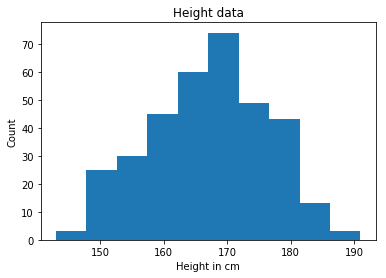

In [4]:
plt.figure()
plt.hist(data)
plt.title("Height data")
plt.xlabel("Height in cm")
plt.ylabel("Count")
plt.show()

In [5]:
NUMBER_OF_GAUSSIANS = 5
NUMBER_OF_TRAINING_ITERATIONS = 20

In [6]:
def initialise(data):
    weights = [1/NUMBER_OF_GAUSSIANS] * NUMBER_OF_GAUSSIANS
    variances = [1.0] * NUMBER_OF_GAUSSIANS
    means = np.linspace(data.min(), data.max(), NUMBER_OF_GAUSSIANS)
    
    return (
        np.array(weights),
        np.array(means),
        np.array(variances)
    )

In [7]:
def evaluate_gaussian(x, mean, variance):
    first = 1 / np.sqrt(2 * np.pi * variance)
    second = np.exp(-0.5 * ((x - mean)**2) / (variance))
    return first * second

In [8]:
def prob_for_one_point(x, weights, means, variances):
    numerators = [weights[i] * evaluate_gaussian(x, means[i], variances[i]) for i in range(NUMBER_OF_GAUSSIANS)] 
    numerators = np.array(numerators)
    denominator = np.sum(numerators)
    return numerators/denominator

In [9]:
# Testing functions

one_point = data[300]
w, m, v = initialise(data)
prob_for_one_point(one_point, w, m, v)

array([2.76982756e-162, 3.09335001e-050, 1.00000000e+000, 9.35762297e-014,
       2.53469490e-089])

In [10]:
def generate_prob_matrix(data, weights, means, variances):
    matrix = np.array([prob_for_one_point(x, weights, means, variances) for x in data])
    matrix = matrix.T
    return matrix

In [11]:
def update_mean(prob_matrix, data, means):
    for i in range(NUMBER_OF_GAUSSIANS):
        numerator = np.sum(prob_matrix[i, :]*data)
        denominator = np.sum(prob_matrix[i, :])
        means[i] = numerator/denominator
    return means
        
def update_variance(prob_matrix, data, means, variances):
    for i in range(NUMBER_OF_GAUSSIANS):
        numerator = np.sum(prob_matrix[i, :]*data*data)
        denominator = np.sum(prob_matrix[i, :])
        variances[i] = numerator/denominator- means[i]**2
    return variances

def update_weight(prob_matrix, weights):
    for i in range(NUMBER_OF_GAUSSIANS):
        weights[i] = np.sum(prob_matrix[i, :]) / len(data)
    return weights

def update_values(prob_matrix, data, weights, means, variances):
    new_means = update_mean(prob_matrix, data, means)
    new_variances = update_variance(prob_matrix, data, new_means, variances)
    new_weights = update_weight(prob_matrix, weights)
    
    return (
        new_weights,
        new_means,
        new_variances
    )

In [12]:
def training_loop(data, NUM_OF_ITERATIONS):
    history = []
    weights, means, variances = initialise(data)
    hist = {
            "iteration": 0,
            "weights": weights.copy(),
            "means": means.copy(),
            "variances": variances.copy()
        }
    history.append(hist)
    for it in range(NUM_OF_ITERATIONS):
        print("Iteration ", it+1, " has started.")
        prob_matrix = generate_prob_matrix(data, weights, means, variances)
        weights, means, variances = update_values(prob_matrix, data, weights, means, variances)
        hist = {
            "iteration": it+1,
            "weights": weights.copy(),
            "means": means.copy(),
            "variances": variances.copy()
        }
        history.append(hist)
        print(f"Iteration ", it+1, " has completed.")
    return weights, means, variances, history

In [13]:
weights, means, variances, history = training_loop(data, NUMBER_OF_TRAINING_ITERATIONS)

Iteration  1  has started.
Iteration  1  has completed.
Iteration  2  has started.
Iteration  2  has completed.
Iteration  3  has started.
Iteration  3  has completed.
Iteration  4  has started.
Iteration  4  has completed.
Iteration  5  has started.
Iteration  5  has completed.
Iteration  6  has started.
Iteration  6  has completed.
Iteration  7  has started.
Iteration  7  has completed.
Iteration  8  has started.
Iteration  8  has completed.
Iteration  9  has started.
Iteration  9  has completed.
Iteration  10  has started.
Iteration  10  has completed.
Iteration  11  has started.
Iteration  11  has completed.
Iteration  12  has started.
Iteration  12  has completed.
Iteration  13  has started.
Iteration  13  has completed.
Iteration  14  has started.
Iteration  14  has completed.
Iteration  15  has started.
Iteration  15  has completed.
Iteration  16  has started.
Iteration  16  has completed.
Iteration  17  has started.
Iteration  17  has completed.
Iteration  18  has started.
Iter

In [14]:
history

[{'iteration': 0,
  'weights': array([0.2, 0.2, 0.2, 0.2, 0.2]),
  'means': array([143., 155., 167., 179., 191.]),
  'variances': array([1., 1., 1., 1., 1.])},
 {'iteration': 1,
  'weights': array([0.01183532, 0.25986317, 0.44918703, 0.26607098, 0.0130435 ]),
  'means': array([145.94274123, 155.71201477, 167.18937125, 177.45175204,
         187.11110687]),
  'variances': array([ 4.91981097, 11.89633094, 10.41437449,  6.91481918,  4.93210526])},
 {'iteration': 2,
  'weights': array([0.00947927, 0.26280908, 0.44793992, 0.26353046, 0.01624126]),
  'means': array([145.75627725, 155.81615518, 167.16928378, 177.22220403,
         186.49595776]),
  'variances': array([ 6.07984911, 14.48833898, 12.53286137,  7.60487733,  5.65172059])},
 {'iteration': 3,
  'weights': array([0.00786717, 0.26423626, 0.44867036, 0.26092134, 0.01830486]),
  'means': array([145.61876925, 155.84538418, 167.16164941, 177.11297612,
         186.13067519]),
  'variances': array([ 6.44910466, 15.97505076, 13.69483533,  7

In [15]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def get_gaussian_for_plot(data, mu, std):
    x = np.linspace(start = data.min(), stop = data.max(), num = 5000)
    f = (1 / np.sqrt(2*np.pi * std**2)) * np.exp((-1/2)*((x-mu)/std)**2)
    
    return x, f

def get_overall_gaussian(data, weights, means, variances):
    x = np.linspace(start = data.min(), stop = data.max(), num = 5000)
    f = []
    for point in x:
        val = 0.0
        for i in range(NUMBER_OF_GAUSSIANS):
            val += weights[i] * evaluate_gaussian(point, means[i], variances[i])
        f.append(val)
    return x, f

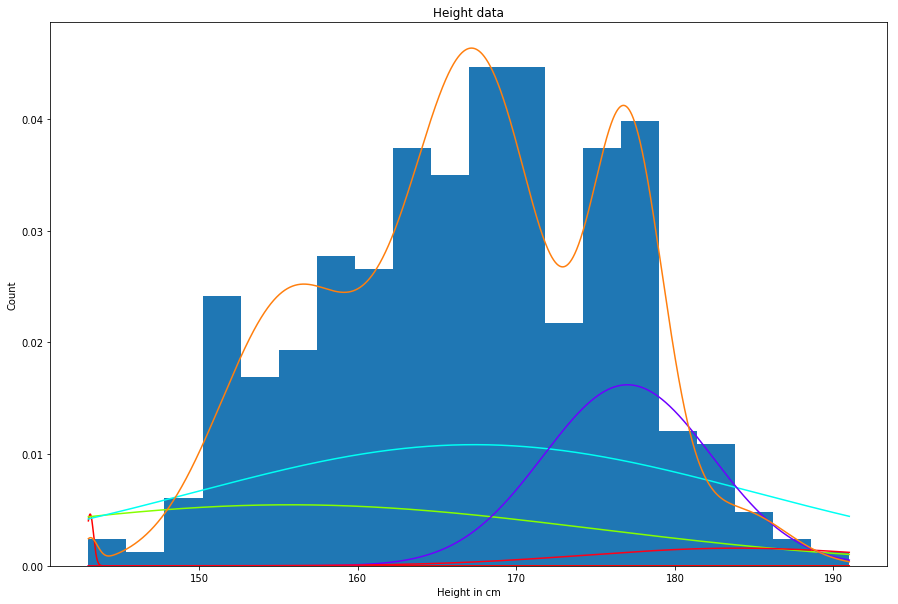

In [18]:
cmap = get_cmap(NUMBER_OF_GAUSSIANS)

figure = plt.figure(figsize = (15, 10))
plt.hist(data, density=True, bins=20)
plt.title("Height data")
plt.xlabel("Height in cm")
plt.ylabel("Count")
for i in range(NUMBER_OF_GAUSSIANS):
    x, f = get_gaussian_for_plot(data, means[i], variances[i])
    plt.plot(x, weights[i] * f, c=cmap(i))
x_total, f_total = get_overall_gaussian(data, weights, means, variances)
plt.plot(x_total, f_total)
plt.show()